## 进入 MMEditing 主目录

In [1]:
import os
os.chdir('mmediting')
os.listdir()

['.git',
 '.circleci',
 '.dele.yml',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.owners.yml',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmedit',
 'model-index.yml',
 'projects',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmedit.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs']

无条件GAN模型不需要输入，输出一个图像。
我们以‘styleganv1’为例。

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmediting/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth


Downloading: "https://download.openmmlab.com/mmediting/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth" to /home/featurize/.cache/torch/hub/checkpoints/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth


Switch to evaluation style mode: single
Switch to evaluation style mode: single
02/27 22:49:25 - mmengine - WARNING - Failed to search registry with scope "mmedit" in the "Collate Functions" registry tree. As a workaround, the current "Collate Functions" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmedit" is a correct scope, or whether the registry is initialized.


/environment/miniconda3/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:166: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


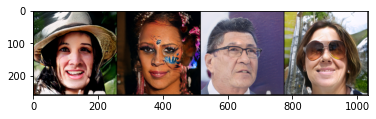

In [2]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# 创建一个MMEdit实例并推断
result_out_dir = 'resources/output/unconditional/tutorial_unconditional_styleganv1_res.png'
editor = MMEdit('styleganv1')
results = editor.infer(result_out_dir=result_out_dir)

# 绘制结果图像
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()